# Predict whether the loan of the applicant will be approved or not 

### Introduction

The core activity of banks is lending of funds. The ultimate profit directly comes from the loan’s interest. Companies grant loan after a long process of verification and validation. However, they still don’t have assurance if the applicant is able to repay the loan with no difficulties.
In this notebook, I'll build a model to predict if an applicant get approval for loan or not.

### TARGET VARIABLE:
our target variable is Loan_Staus: YES or NO

Predicting whether applicant will get approval for loan from bank or not.

## Content:

1) Importing Libraries and loading the data

2) Understanding the data

3) Exploratory Data Analysis (EDA)

   i. Univariate Analysis
   
   ii. Bivariate Analysis
   
   iii. multivariate Analysis
   
4) Missing value and outlier treatment

5) Checking Skewness

6) Splitting the data in dependent & independent variables

7) Finding best random state

8) Finding best algorithm with cross-validation score

9) HyperParameter tuning with best model

10) AUC_ROC Curve

11) Saving our model

In [11]:
# importing libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [12]:
# load the dataset in DataFrame

In [13]:
df = pd.read_csv('loan_prediction.csv')

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
df.size

7982

In [16]:
# looking top 10 rows

df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [17]:
#l looking last 10 rows

df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [18]:
df.shape

(614, 13)

In [19]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
df.columns.size

13

In [21]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### We can see there are three kinds of data types:

object: It means variables are categorical. Following are the Categorical variables in our dataset:
     Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

int64: It represents the integer variables. "ApplicantIncome" is given in int64 format.

float64: It represents the variable that has some decimal values. They are also numerical.Following are the float64 variables in our dataset: CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History.

# DESCRIBING DATA

The measures of central tendency and distribution are some measures to define the data set.

The measures used to define the central tendency are mean, median and mode.

The standard deviations (or variance) are the minimum and maximum values of variables. The table below is a summary of some statistical measures for each numeric predictor of the dataset:

count: It indicates the number of records for each attribute that corresponds to the number of Attrition.

mean: It indicates the average value around which each group of attributes is attested.

std (Standard Deviation): It indicates the standard deviation of each attribute group, from which we can guess the degree of data dispersion around the average.

max and min indicate the attribute that I assume the highest and lowest value for each attribute group.



In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


describe() fuction only shows variable which are numerical or continous in nature.

That's why Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status are not shown in above table.

# EXPLORATORY DATA ANALYSIS

In [23]:
# Look at the values in each columns 
for i in df:
    print(df[i].value_counts())
    print("____________________________________________________________")

LP002137    1
LP002615    1
LP001665    1
LP002068    1
LP002587    1
           ..
LP002447    1
LP002527    1
LP001146    1
LP002272    1
LP002390    1
Name: Loan_ID, Length: 614, dtype: int64
____________________________________________________________
Male      489
Female    112
Name: Gender, dtype: int64
____________________________________________________________
Yes    398
No     213
Name: Married, dtype: int64
____________________________________________________________
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
____________________________________________________________
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
____________________________________________________________
No     500
Yes     82
Name: Self_Employed, dtype: int64
____________________________________________________________
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Leng

### Visulaizing our target variable:

Y    422
N    192
Name: Loan_Status, dtype: int64

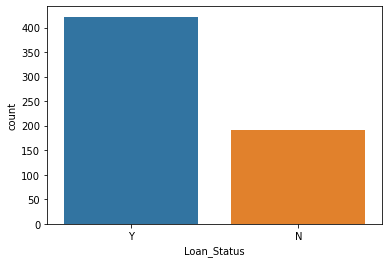

In [24]:
#Get the count of Loan Approved(our target variable)

sns.countplot(x = 'Loan_Status', data = df)
df["Loan_Status"].value_counts()

The loan of 422 people is approved.

## Analysis of Independent Variable which are Categorical in nature

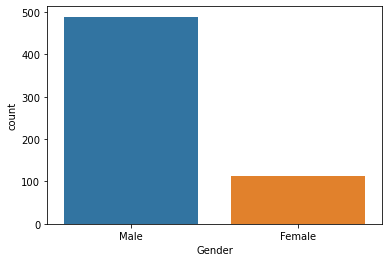

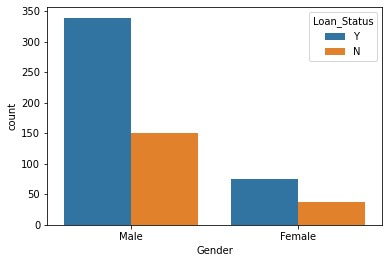

In [25]:
# first visualizing the total count of males & females.

# than visualizing out of total males and females how many got approval for loan_status.



sns.countplot(x = 'Gender', data = df)
plt.show()

plt.subplots(figsize=(6,4))
sns.countplot(x="Gender",hue="Loan_Status",data=df)

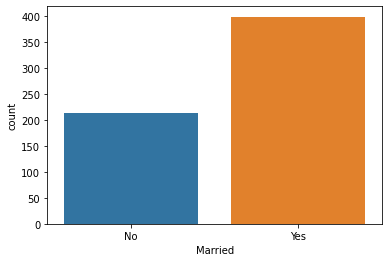

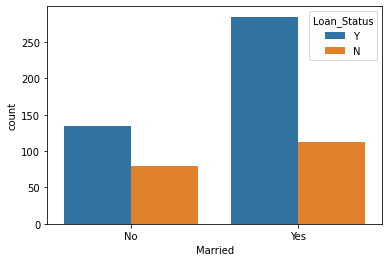

In [26]:
# first visualizing the total count of married people.

# than visualizing out of total married people how many got approval for loan_status.


sns.countplot(x = 'Married', data = df)
plt.show()


plt.subplots(figsize=(6,4))
sns.countplot(x="Married",hue="Loan_Status",data=df)

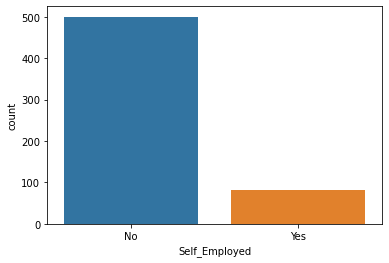

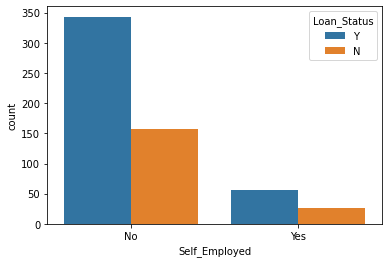

In [27]:
# first visualizing the total count of self-employed people.

# than visualizing out of total self-employed people how many got approval for loan_status.




sns.countplot(x = 'Self_Employed', data = df)
plt.show()


plt.subplots(figsize=(6,4))
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df)

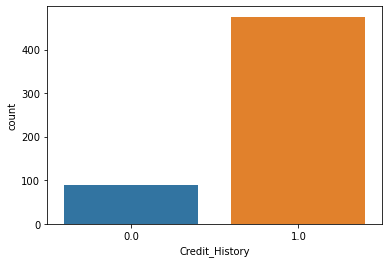

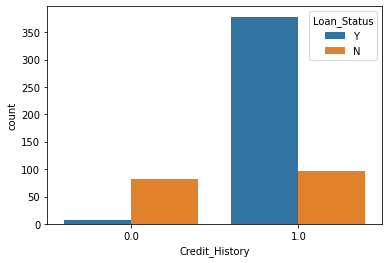

In [28]:
# first visualizing the total count of people having credit_history.

# than visualizing out of total people having credit_hostory how many got approval for loan_status.




sns.countplot(x = 'Credit_History', data = df)
plt.show()



plt.subplots(figsize=(6,4))
sns.countplot(x="Credit_History",hue="Loan_Status",data=df)

## Analysis of Independent Variable which are Ordinal in nature

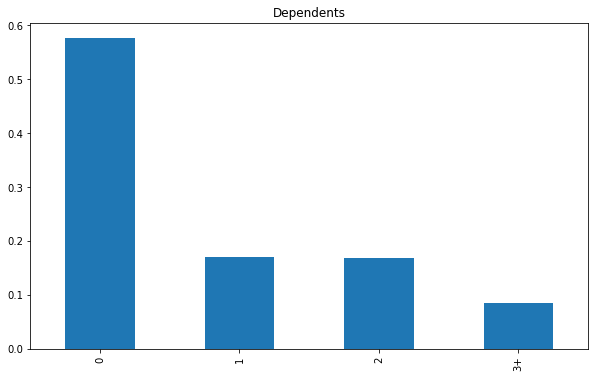

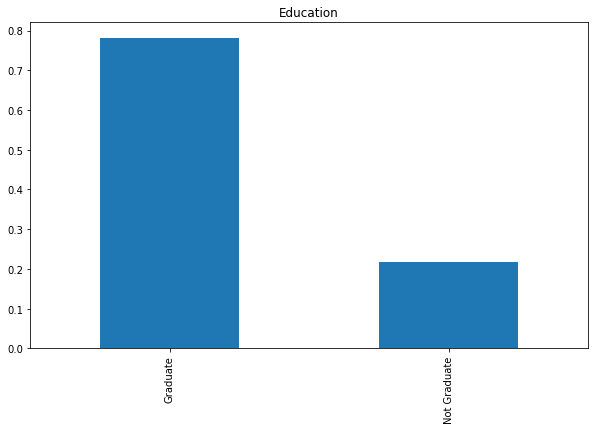

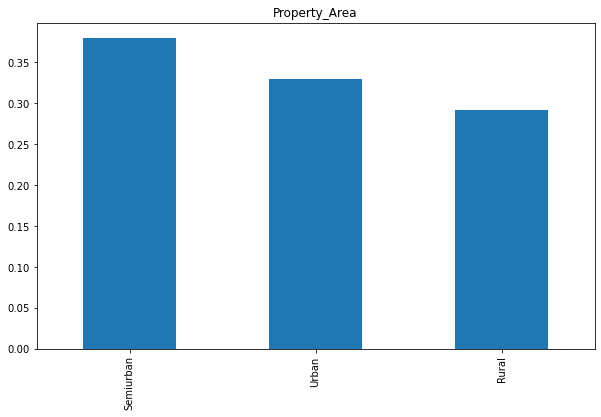

In [29]:
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Dependents')
plt.show()
df['Education'].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Education')
plt.show()
df['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Property_Area')
plt.show()

The following are my observations:

Most of the applicants are the one who don't have any dependents.

Around 80% of the total applicants are Graduate.

Mosty applicants are from the Semiurban area.

## Analysis of  Variable which are Continous

In [30]:
# we use histogram for showing our continous variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8B0FD26D0>,
      dtype=object)

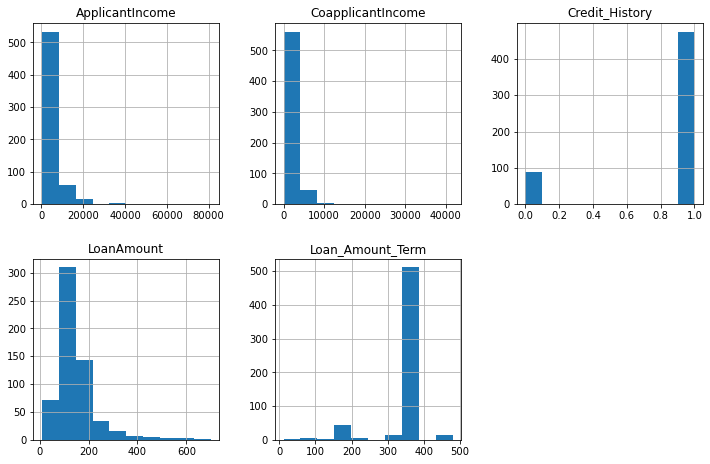

In [31]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False)

##### we can visualize that data under ApplicantIncome, CoapplicantIncome, LoanAmount is right skewed.

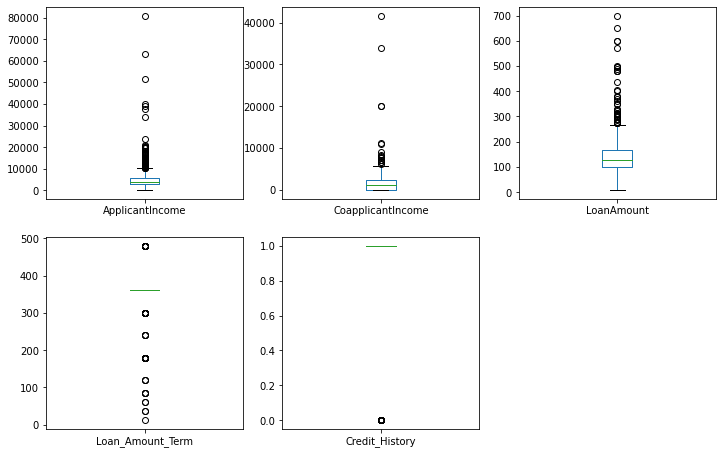

In [32]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

##### we can see that some outliers are present in oue datset which we will treat later.

# DATA PREPROCESSING

### checking missing values

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [34]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that null values are present in our datset.

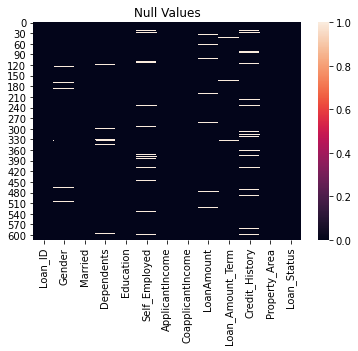

In [35]:
# visualizing null values through heat-map

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

There are missing values present in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

We will treat the missing values one by one.

We will consider these methods to fill these missing values:

For numerical variables:  using mean or median

For categorical variables:  using mode

There are very few missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we will fill them using the mode as these are categorical features.

In [36]:

## filling null values with mode


df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use the median to fill the null values as earlier we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [37]:
## treating null values with median


df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

Now we have treated the LoanAmount variable. As it is a numerical variable, we can use mean or median to treat the missing values. We have used the median to fill the null values as earlier we saw that the loan amount has outliers so treating missing values with the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [38]:
## treating null values with mean.


df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [39]:
### checking null values after treating them

In [40]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

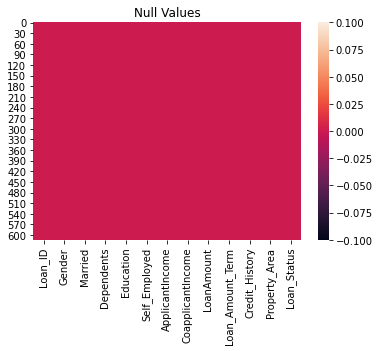

In [41]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

### We can see that no NaN value is present in our datset now.

## Droping irrelevant columns:

In [42]:
df = df.drop(columns=['Loan_ID'])

We droped this column because high number of unique values.
irrelevant to our predictions.

In [43]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# FINDING CORRELATION

In [44]:
corr= df.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


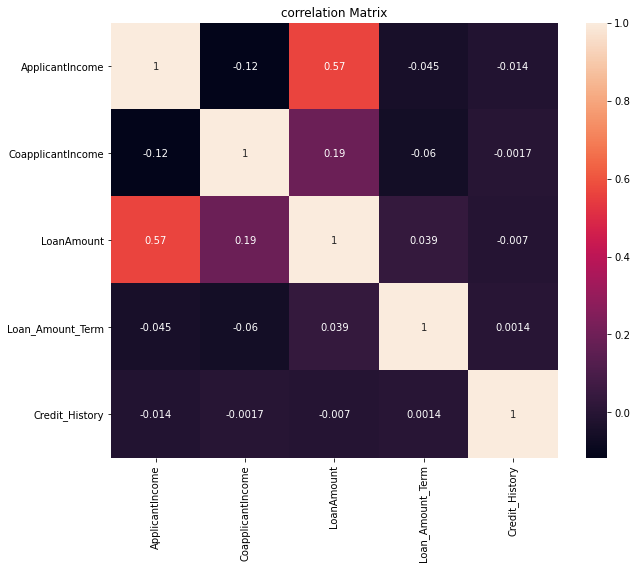

In [45]:
corr_mat=df.corr()   

plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

we can see that our target varaiable is not showing in the heatmap. It is happening because we have string values in class we need to labelEncode it first.

OBSERVATIONS:

LoanAmount & ApplicantIncome has a good positive relationship.

# LabelEncoding

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
for i in df.columns:
    if df[i].dtypes== "object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [48]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


#### Now we can see that our whole dataset variables are in numeric form

###  Checking correlation again:

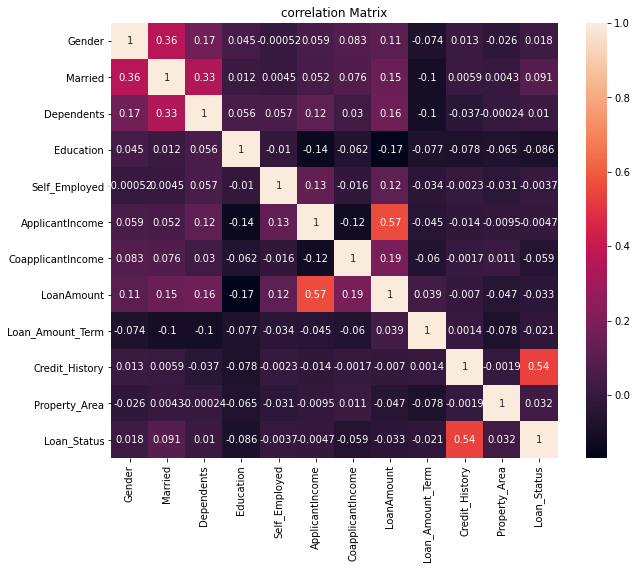

In [49]:
corr_mat=df.corr()   

plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [50]:
corr_matrix=df.corr()
corr_matrix["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

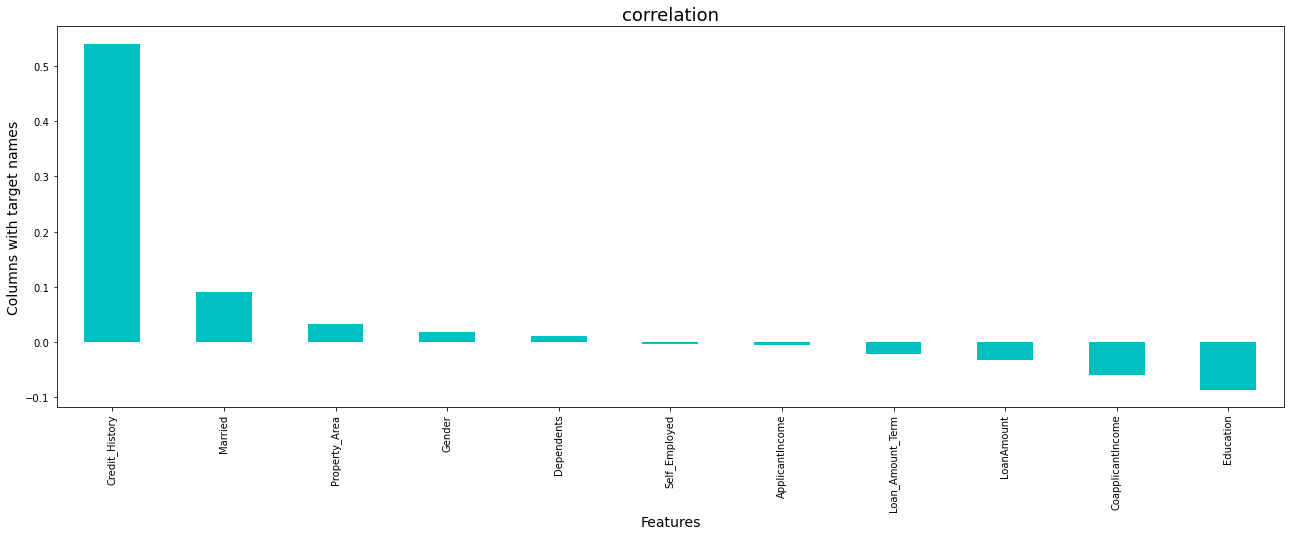

In [51]:
plt.figure(figsize=(22,7))
df.corr()["Loan_Status"].sort_values(ascending=False).drop(["Loan_Status"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show

##### Following are my observations:

Credit_History is positively correleated with Loan_status

We can see that there is no relationship between Loan_status & Dependents, Loan_status & Self_employed, Loan_status & Applicant Income.

Education & Loan_status shows negative relationship.

# Splitting the data into X & Y

In [52]:
x= df.drop("Loan_Status",axis=1)     # independent variable
y= df["Loan_Status"]                 # dependent variable

In [53]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# SCALING

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

Now every column value is between 0 & 1. We can compare the data more accurately.

In [55]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.743590,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


# TREATING OUTLIERS 

In [56]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

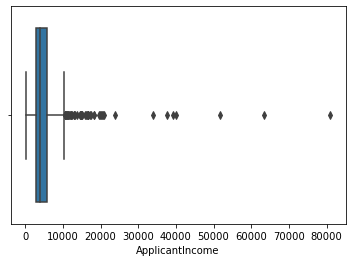

In [57]:
sns.boxplot(df["ApplicantIncome"])

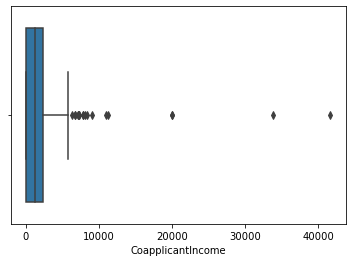

In [58]:
sns.boxplot(df["CoapplicantIncome"])

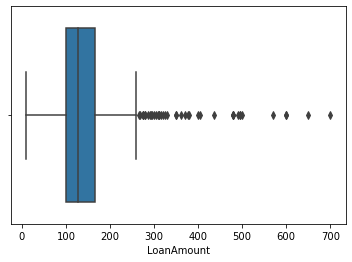

In [59]:
sns.boxplot(df["LoanAmount"])

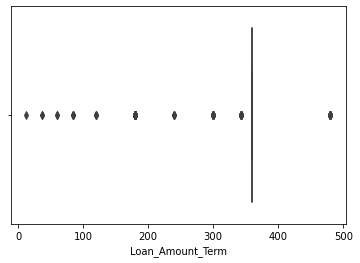

In [60]:
sns.boxplot(df["Loan_Amount_Term"])

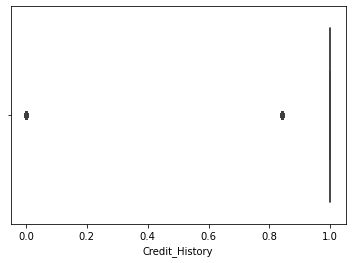

In [61]:
sns.boxplot(df["Credit_History"])

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. 

# Checking Skweness

In [62]:
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
dtype: float64

#### OBSERVATIONS:

We will check skewness only of variable which are numerical.

ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term has high skewnes.

We will treat skewness through power_transform.

In [63]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

x_new=pd.DataFrame(x_new,columns=x.columns)

In [64]:
x_new.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.479315
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.366420
CoapplicantIncome    0.357037
LoanAmount          -0.042178
Loan_Amount_Term     0.588585
Credit_History      -1.599912
Property_Area       -0.107041
dtype: float64

####  No skewness present in our data now.

# FINDING BEST RANDOM STATE

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.30, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.8486486486486486 on Random_state 8


Best Random state for our data in at 8 where we will get maximum Accuracy.

# CREATING TRAIN TEST SPLIT

In [66]:
### checking accuracy score and cross-validation score with different Algorithms:

### LogisticRegression

In [67]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.30, random_state=8)
LR=LogisticRegression(random_state=8)
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

## CROSS VALIDATION SCORE

from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("cross validation score of LogisticRegression model:", scr.mean())
print("accuracy score of LogisticRegression model:",accuracy_score(y_test,predlr))

0.8486486486486486
[[ 31  21]
 [  7 126]]
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        52
           1       0.86      0.95      0.90       133

    accuracy                           0.85       185
   macro avg       0.84      0.77      0.79       185
weighted avg       0.85      0.85      0.84       185

cross validation score of LogisticRegression model: 0.8078368652538984
accuracy score of LogisticRegression model: 0.8486486486486486


### SupportVectorClassifier

In [68]:
from sklearn.svm import SVC
x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.30, random_state=8)
svc= SVC(random_state=8)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

## CROSS VALIDATION SCORE

scr=cross_val_score(svc,x,y,cv=5)
print("cross validation score of SVC model:", scr.mean())
print("accuracy score of SVC model:",accuracy_score(y_test,predsvc))

0.8540540540540541
[[ 29  23]
 [  4 129]]
              precision    recall  f1-score   support

           0       0.88      0.56      0.68        52
           1       0.85      0.97      0.91       133

    accuracy                           0.85       185
   macro avg       0.86      0.76      0.79       185
weighted avg       0.86      0.85      0.84       185

cross validation score of SVC model: 0.809462881514061
accuracy score of SVC model: 0.8540540540540541


### RandomForestClassifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.30, random_state=8)
rf= RandomForestClassifier(random_state=8)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


## CROSS VALIDATION SCORE

scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of RandomForestClassifier model:", scr.mean())
print("accuracy score of RandomForestClassifier model:",accuracy_score(y_test,predrf))

0.827027027027027
[[ 31  21]
 [ 11 122]]
              precision    recall  f1-score   support

           0       0.74      0.60      0.66        52
           1       0.85      0.92      0.88       133

    accuracy                           0.83       185
   macro avg       0.80      0.76      0.77       185
weighted avg       0.82      0.83      0.82       185

cross validation score of RandomForestClassifier model: 0.7964547514327601
accuracy score of RandomForestClassifier model: 0.827027027027027


##### We will proceed with RandomForestClassifier as it is giving highest accuracy_score and there is minimum difference between accuracy_score & cross_validation_score.

# Hyperparameter tunning with best model

In [70]:
### importing GridSearchCV

from sklearn.model_selection import GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':("gini", "entropy"), "max_features":["auto","sqrt","log2"]}

x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.30, random_state=8)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'log2'}


In [72]:
clf_pred=clf.best_estimator_.predict(x_test)

In [73]:
accuracy_score(y_test,clf_pred)

0.8378378378378378

In [74]:
rf=RandomForestClassifier( criterion='gini',  max_features='log2',  random_state=8)

In [75]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', random_state=8)

# AUC_ROC CURVE

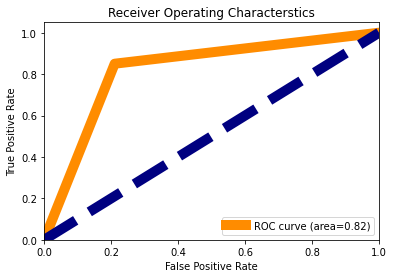

In [76]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(clf_pred,y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=10, label="ROC curve (area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color="navy", lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics")
plt.legend(loc="lower right")
plt.show()

## The area under curve is 82%.

# SAVING OUR MODEL

In [77]:
import pickle
filename= "Loan_prediction_rf.pkl"
pickle.dump(rf,open(filename,"wb"))

# LOAD THE MODEL

In [78]:
loaded_model=pickle.load(open("Loan_prediction_rf.pkl","rb"))

result= loaded_model.score(x_test,y_test)
print(result)

0.827027027027027


# RESULT:

In [79]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],clf_pred[:]],index=["predicted","original"])

In [80]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
predicted,0,1,1,1,1,1,1,1,1,1,...,0,1,0,1,0,1,0,1,0,1
original,0,1,1,1,1,1,1,1,1,1,...,0,1,0,1,0,1,0,1,1,1
